In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df_1=pd.read_csv('df_1-10.csv',index_col=[0])
df_2=pd.read_csv('df_10-20.csv',index_col=[0])
df_3=pd.read_csv('df_20-30.csv',index_col=[0])
df_4=pd.read_csv('df_30-40.csv',index_col=[0])
df_5=pd.read_csv('df_40-50.csv',index_col=[0])
df_2 = df_2.rename(columns={'Urun':'Ürün'}) 
df_3 = df_3.rename(columns={'Urun':'Ürün'})
df_4 = df_4.rename(columns={'Urun':'Ürün'})
df=pd.concat([df_1,df_2,df_4,df_3])
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,Ürün,Ekran Boyutu,Dahili Depolama,Bellek(Ram),Puan,Batarya Kapasitesi,Hat Sayısı,Hızlı Şarj,Kamera Çözünürlüğü,Parmak İzi,Ekran Yenileme Hızı,İşletim Sistemi,NFC,Fiyat
0,Apple iPhone 14 Pro Max (1 TB),6.7 İnç,1 TB,6 GB,100puan,4323 mAh,Çift Hat,Var,48 MP,Yok,120 Hz,iOS,Var,"59.199,00"
1,Apple iPhone 14 Pro (1 TB),6.1 İnç,1 TB,6 GB,97puan,3200 mAh,Çift Hat,Var,48 MP,Yok,120 Hz,iOS,Var,"54.959,00"
2,Samsung Galaxy S22 Ultra (512 GB),6.8 İnç,512 GB,12 GB,97puan,5000 mAh,Çift Hat,Var,108 MP,Var,120 Hz,Android,Var,"34.890,00"
3,Apple iPhone 13 Pro Max (1 TB),6.7 İnç,1 TB,6 GB,94puan,4352 mAh,Çift Hat,Var,12 MP,Yok,120 Hz,iOS,Var,"46.952,00"
4,Xiaomi 12 Pro,6.73 İnç,256 GB,12 GB,94puan,4600 mAh,Çift Hat,Var,50 MP,Var,120 Hz,Android,Var,"27.399,90"


In [ ]:
#Duplicated rows are dropped.
df.drop_duplicates(inplace=True)

In [ ]:
for i in df.columns:
    print(df[i].value_counts(),'\n\n')
    
#TB and MB type are converted to GB.
#These should be cleaned.

Samsung Galaxy A23 (4 GB / 128 GB) (SM-A235F)    2
Samsung Galaxy A7 (2018) (SM-A750F)              2
Casper VIA A4 (128 GB)                           2
Huawei P30 Pro                                   2
Samsung Galaxy M20 (Çift Hat / 64 GB)            2
                                                ..
Samsung Galaxy S7 edge (Tek Hat) (SM-G935F)      1
Samsung Galaxy M40 (SM-M405F/DS)                 1
Redmi 10                                         1
TCL Plex (T780H)                                 1
Samsung Galaxy J7 Prime 2 (SM-G611F)             1
Name: Ürün, Length: 1196, dtype: int64 


5.5 İnç     191
6.5 İnç      78
5.2 İnç      70
6.67 İnç     58
5.7 İnç      56
           ... 
6.49 İnç      1
6.65 İnç      1
6.66 İnç      1
6.56 İnç      1
4.0 İnç       1
Name: Ekran Boyutu, Length: 78, dtype: int64 


128 GB    330
64 GB     325
32 GB     314
16 GB     115
256 GB    103
512 GB     16
1 TB        5
Name: Dahili Depolama, dtype: int64 


4 GB      385
3 GB      313
6 GB    

In [ ]:
# Units of features are dropped.
df['Puan']=df['Puan'].apply(lambda x : str(x).replace('puan',''))
df['Ekran Boyutu']=df['Ekran Boyutu'].apply(lambda x:str(x).replace('İnç',''))
df['Dahili Depolama']=df['Dahili Depolama'].apply(lambda x:str(x).replace('GB',''))
df['Dahili Depolama']=df['Dahili Depolama'].apply(lambda x:str(x).replace('TB',''))
df['Bellek(Ram)']=df['Bellek(Ram)'].apply(lambda x:str(x).replace('GB',''))
df['Bellek(Ram)']=df['Bellek(Ram)'].apply(lambda x:str(x).replace('MB',''))
df['Batarya Kapasitesi']=df['Batarya Kapasitesi'].apply(lambda x:str(x).replace('mAh',''))
df['Kamera Çözünürlüğü']=df['Kamera Çözünürlüğü'].apply(lambda x:str(x).replace('MP',''))
df['Ekran Yenileme Hızı']=df['Ekran Yenileme Hızı'].apply(lambda x:str(x).replace('Hz',''))

In [ ]:
# 'Fiyat' column is modified. 
df['Fiyat'] = df['Fiyat'].apply(lambda x: str(x).replace('.',''))
df['Fiyat'] = df['Fiyat'].apply(lambda x: str(x).replace(',','.'))

In [ ]:
# Nan values are dropped
df.dropna(inplace=True)

In [ ]:
#Some columns are converted to integer and float type.
df['Bellek(Ram)']=df['Bellek(Ram)'].astype(float)
df['Dahili Depolama']=df['Dahili Depolama'].astype(float)
df['Ekran Boyutu'] = df['Ekran Boyutu'].astype(float)
df['Puan'] = df['Puan'].astype(float)
df['Batarya Kapasitesi'] = df['Batarya Kapasitesi'].astype(int)
df['Kamera Çözünürlüğü'] = df['Kamera Çözünürlüğü'].astype(float)
df['Ekran Yenileme Hızı'] = df['Ekran Yenileme Hızı'].astype(int)
df['Fiyat'] = df['Fiyat'].astype(float)

In [ ]:
# All values of 'Dahili Depolama' and 'Bellek(Ram)' are converted to GB.
def TBtoGB(TB):
  if TB == 1:
    TB = TB*1000
  else:
    TB
  return TB

def MBtoGB(MB):
  if MB == 512:
    MB = MB/1000
  else:
    MB
  return MB

df['Dahili Depolama']=df['Dahili Depolama'].apply(lambda x:TBtoGB(x))
df['Bellek(Ram)']=df['Bellek(Ram)'].apply(lambda x:MBtoGB(x))

In [ ]:
#İrrelevant data are dropped.
drop_values_index=[]
drop_values_index.append(df[df['Parmak İzi'] == 'Dynamic Contrast Enhancer'].index)
drop_values_index.append(df[df['NFC'] == 'EKRAN\n\n\nEkran Boyutu\n\n\n6.67 İnç\n\n\n\n\nEkran Teknolojisi\n\n\nIPS LCD\n\n\n\n\nEkran Çözünürlüğü\n\n\n1080x2400 (FHD+) Piksel\n\n\n\n\nEkran Çözünürlüğü Standardı\n\n\nFHD+\n\n\n\n\nPiksel Yoğunluğu\n\n\n395 PPI \n\n\n\nEkran Yenileme Hızı\n\n\n120 Hz\n\n\n\n\nEkran Oranı (Aspect Ratio)\n\n\n20:9\n\n\n\n\nEkran Alanı\n\n\n107.16 cm² \n\n\n\nEkran Özellikleri\n\n\nHDR\n\n\nÇizilmeye Dirençli Cam\n\n\nHDR10\n\n\nMulti Touch\n\n\nÇerçevesiz Tasarım\n\n\nEkran İçinde Ön Kamera\n\n\n240 Hz Screen Touch Response\n\n\n1500:1 Kontrast Oranı\n\n\n\n\nEkran Dayanıklılığı\n\n\nCorning Gorilla Glass 5\n\n\n\n\nDokunmatik Türü\n\n\nKapasitif Ekran \n\n\n\nRenk Sayısı\n\n\n16 Milyon\n\n\n\n\nEkran / Gövde Oranı\n\n\n84.41 % \n\n\n\n\n\n BATARYA\n\n\nBatarya Kapasitesi (Tipik)\n\n\n5160 mAh\n\n\n\n\nOyun\n\n\n10 Saat \n\n\n\nVideo Oynatma\n\n\n17 Saat \n\n\n\nMüzik Oynatma\n\n\n153 Saat \n\n\n\nŞarj\n\n\nUSB Type-C\n\n\n\n\nBatarya Teknolojisi\n\n\nLithium Polymer (Li-Po)\n\n\n\n\nHızlı Şarj\n\n\nVar\n\n\n\n\nHızlı Şarj Gücü (Maks.)\n\n\n33 W\n\n\n\n\nHızlı Şarj Özellikleri\n\n\nHızlı Şarj (33W)\n\n\n\n\nŞarj Süresi (Üretici Verisi)\n\n\n65 Dakika \n\n\n\nKablosuz Şarj\n\n\nYok \n\n\n\nDeğişir Batarya\n\n\nYok \n\n\n\n\n\n KAMERA\n\n\nKamera Çözünürlüğü\n\n\n64 MP\n\n\n\n\nOptik Görüntü Sabitleyici (OIS)\n\n\nYok \n\n\n\nKamera Özellikleri\n\n\nPortre Modu (Bokeh)\n\n\nPhase Detect Auto-Focus (PDAF)\n\n\nYapay Zeka (AI) Destekli Portre Modu\n\n\nHDR\n\n\nYapay Zeka (AI) Sahne Algılama\n\n\nPerde Hızı (Shutter Speed) Kontrolü\n\n\nPanorama\n\n\nRAW Kayıt Yapabilme\n\n\nOtomatik odaklama\n\n\nDahili QR Kod Okuyucu\n\n\nMakro (Macro) Çekim (4 cm)\n\n\nPerde hızı (Shutter Speed): 30 sn\n\n\nSeri Çekim (Burst) Modu\n\n\nSony Exmor RS Sensör (IMX682)\n\n\nZamanlayıcı\n\n\n0.8μm (1.6μm) Piksel\n\n\n\n\nFlaş\n\n\nLED\n\n\n\n\nDiyafram Açıklığı\n\n\nF1.89\n\n\n\n\nKamera Sensör Boyutu\n\n\n1/1.73 İnç\n\n\n\n\nVideo Kayıt Çözünürlüğü\n\n\n2160p (Ultra HD) 4K\n\n\n\n\nVideo FPS Değeri\n\n\n30 fps\n\n\n\n\nVideo Kayıt Özellikleri\n\n\nDijital görüntü sabitleyici (EIS)\n\n\nDijital görüntü sabitleyici (EIS) (4K)\n\n\nTime-lapse (Hyperlapse)\n\n\nYavaş Çekim Video Kayıt (Slow motion video)\n\n\n\n\nVideo Kayıt Seçenekleri\n\n\n720p @ 30fps\n\n\n1080p @ 30fps\n\n\n1080p @ 60fps\n\n\n2160p @ 30fps\n\n\n\n\nAğır Çekim Kayıt Seçenekleri\n\n\n720p @ 120fps\n\n\n720p @ 240fps\n\n\n720p @ 960fps\n\n\n1080p @ 120fps\n\n\n\n\nİkinci Arka Kamera\n\n\nVar\n\n\n\n\nİkinci Arka Kamera Çözünürlüğü\n\n\n13 MP\n\n\n\n\nİkinci Arka Kamera Diyafram\n\n\nF2.2 \n\n\n\nİkinci Arka Kamera Özellikleri\n\n\nEkstra Geniş Açı\n\n\nEkstra Geniş Açı (119°)\n\n\n1.0 µm Piksel\n\n\n\n\nÜçüncü Arka Kamera\n\n\nVar\n\n\n\n\nÜçüncü Arka Kamera Çözünürlüğü\n\n\n2 MP\n\n\n\n\nÜçüncü Arka Kamera Diyafram\n\n\nF2.4 \n\n\n\nÜçüncü Arka Kamera Özellikleri\n\n\nMakro (Macro) Çekim\n\n\n1.75μm Piksel\n\n\n\n\nDördüncü Arka Kamera\n\n\nVar\n\n\n\n\nDördüncü Arka Kamera Çözünürlüğü\n\n\n2 MP \n\n\n\nDördüncü Arka Kamera Diyafram\n\n\nF2.4 \n\n\n\nDördüncü Arka Kamera Özellikleri\n\n\nDerinlik Algısı (Bokeh)\n\n\n1.75 µm Piksel\n\n\n\n\nÖn Kamera Çözünürlüğü\n\n\n20 MP\n\n\n\n\nÖn Kamera Video Çözünürlüğü\n\n\n1080p \n\n\n\nÖn Kamera FPS Değeri\n\n\n30 fps \n\n\n\nÖn Kamera Diyafram Açıklığı\n\n\nF2.2\n\n\n\n\nÖn Kamera Özellikleri\n\n\nPortre Modu\n\n\nYapay Zeka (AI) Destekli Portre Modu\n\n\nHDR\n\n\nSanal Flaş\n\n\nYapay Zeka (AI) Sahne Algılama\n\n\nYapay Zeka (AI) Yüz Tanımlama (Face ID)\n\n\nGesture Shot\n\n\nYapay Zeka (AI) İyileştirme\n\n\nZamanlayıcı (self-timer)\n\n\nDijital görüntü sabitleyici (EIS)\n\n\nPanorama Selfi\n\n\n0.8μm (1.6μm) Piksel\n\n\n\n\nDxOMark Camera (v4)\n\n\n103 Puan \n\n\n\n\n\n TEMEL DONANIM\n\n\nYonga Seti (Chipset)\n\n\nQualcomm Snapdragon 732G (SM7150-AC)\n\n\n\n\nCPU Frekansı\n\n\n2.3 GHz\n\n\n\n\nCPU Çekirdeği\n\n\n8 Çekirdek\n\n\n\n\nAna İşlemci (CPU)\n\n\n2x 2.3 GHz ARM Cortex-A76 (Kryo 470)\n\n\n\n\n1. Yardımcı İşlemci\n\n\n6x 1.8 GHz ARM Cortex-A55\n\n\n\n\nİşlemci Mimarisi\n\n\n64-bit\n\n\n\n\nGrafik İşlemcisi (GPU)\n\n\nAdreno 618\n\n\n\n\nGPU Frekansı\n\n\n800 MHz \n\n\n\nCPU Üretim Teknolojisi\n\n\n8 nm\n\n\n\n\nAnTuTu Puanı (v8)\n\n\n283.800 Puan \n\n\n\nAnTuTu Puanı (v9)\n\n\n352.100 Puan \n\n\n\nGeekbench 5 (Single-core)\n\n\n570 Puan \n\n\n\nGeekbench 5 (Multi-core)\n\n\n1.775 Puan \n\n\n\nBellek (RAM)\n\n\n6 GB\n\n\n\n\nRAM Tipi\n\n\nLPDDR4X\n\n\n\n\nDahili Depolama\n\n\n128 GB\n\n\n\n\nDahili Depolama Biçimi\n\n\nUFS 2.1\n\n\n\n\nHafıza Kartı Desteği\n\n\nVar\n\n\n\n\nHafıza Kartı Maks. Kapasitesi\n\n\n256 GB\n\n\n\n\nDiğer Hafıza Seçenekleri\n\n\n64/128GB Depolama seçeneği var \n\n\n\n\n\n TASARIM\n\n\nBoy\n\n\n165.3 mm \n\n\n\nEn\n\n\n76.8 mm \n\n\n\nKalınlık\n\n\n9.4 mm \n\n\n\nAğırlık\n\n\n215 Gram \n\n\n\nRenk Seçenekleri\n\n\nGri\n\n\nMavi\n\n\n\n\nGövde Malzemesi (Kapak)\n\n\nPlastik (Cam Görünümlü)\n\n\n\n\nGövde Malzemesi (Çerçeve)\n\n\nAlüminyum\n\n\n\n\n\n\n AĞ BAĞLANTILARI\n\n\n2G\n\n\nVar\n\n\n\n\n2G Frekansları\n\n\n850 MHz \n\n900 MHz \n\n1800 MHz \n\n1900 MHz \n\n\n\n3G\n\n\nVar\n\n\n\n\n3G Frekansları\n\n\n850 (band 5) MHz \n\n900 (band 8) MHz \n\n1700 (band 4) MHz \n\n1900 (band 2) MHz \n\n2100 (band 1) MHz \n\n\n\n3G İndirme\n\n\n42.2 Mbps \n\n\n\n3G Karşıya Yükleme\n\n\n5.76 Mbps \n\n\n\n4G\n\n\nVar\n\n\n\n\n4G Frekansları\n\n\n700 (band 28) MHz\n\n\n800 (band 20) MHz\n\n\n850 (band 5) MHz\n\n\n900 (band 8) MHz\n\n\n1700/2100 (band 4) MHz\n\n\n1800 (band 3) MHz\n\n\n1900 (band 2) MHz\n\n\n2100 (band 1) MHz\n\n\n2600 (band 7) MHz\n\n\n\n\n4G Frekansları Notu\n\n\nSatıcı ya da bölgeye göre değişiklik gösterebilir \n\n\n\n4G Özellikleri\n\n\nVoLTE (Voice over LTE) Desteği\n\n\n\n\n4.5G Desteği\n\n\nVar\n\n\n\n\n5G\n\n\nYok \n\n\n\n\n\n İŞLETİM SİSTEMİ\n\n\nİşletim Sistemi\n\n\nAndroid\n\n\n\n\nİşletim Sistemi Versiyonu\n\n\nAndroid 10 (Q)\n\n\n\n\nYükseltilebilir Versiyon\n\n\nAndroid 11 (R)\n\n\n\n\nKullanıcı Arayüzü\n\n\nMIUI For POCO\n\n\n\n\nLansman Arayüz Versiyonu\n\n\nMIUI 12\n\n\n\n\n\n\n KABLOSUZ BAĞLANTILAR\n\n\nWi-Fi Kanalları\n\n\nWi-Fi 5 (802.11 a/b/g/n/ac)\n\n\n\n\nWi-Fi Özellikleri\n\n\nMIMO\n\n\nDual-Band (5GHz)\n\n\nWi-Fi Direct\n\n\nWi-Fi Display\n\n\nWi-Fi Hotspot\n\n\nVoWiFi (Voice over Wi-Fi)\n\n\n2X MIMO\n\n\n\n\nNFC\n\n\nVar\n\n\n\n\nBluetooth Versiyonu\n\n\n5.1\n\n\n\n\nKızılötesi\n\n\nVar\n\n\n\n\nNavigasyon Özellikleri\n\n\nGPS\n\n\nA-GPS\n\n\nBDS\n\n\nGalileo\n\n\nGLONASS\n\n\n\n\n\n\n ÇOKLU ORTAM\n\n\nRadyo\n\n\nVar\n\n\n\n\nHoparlör Özellikleri\n\n\nStereo\n\n\nÇift Hoparlör\n\n\n\n\nSes Çıkışı\n\n\n3.5 mm\n\n\n\n\n\n\n ÖZELLİKLER\n\n\nSuya Dayanıklılık\n\n\nVar\n\n\n\n\nSuya Dayanıklılık Seviyesi\n\n\nIPX3\n\n\n\n\nToza Dayanıklılık\n\n\nVar\n\n\n\n\nToza Dayanıklılık Seviyesi\n\n\nIP5X\n\n\n\n\n3G Görüntülü Arama (Şebeke ile)\n\n\nYok \n\n\n\nGörüntülü Konuşma (Uygulama)\n\n\nVar\n\n\n\n\nSensörler\n\n\nJiroskop\n\n\nPusula\n\n\nYakınlık Sensörü\n\n\nOrtam Işığı Sensörü\n\n\nİvmeölçer\n\n\n\n\nParmak izi Okuyucu\n\n\nVar\n\n\n\n\nParmak izi Okuyucu Özellikleri\n\n\nYan Tarafta\n\n\n\n\nBildirim Işığı (LED)\n\n\nVar\n\n\n\n\nSAR Değeri 10g (Baş)\n\n\n0.558 W/kg \n\n\n\nSAR Değeri 10g (Vücut)\n\n\n0.986 W/kg \n\n\n\nServis ve Uygulamalar\n\n\nDahili Likit Soğutma Sistemi\n\n\nEkran Yansıtma (Screen Mirroring)\n\n\nEkrana Çift Dokunarak Açma (KnockON)\n\n\nGürültü Önleyici 2 Mikrofon\n\n\nHi-Res Audio Sertifikası\n\n\nKaranlık Mod (Dark Mode)\n\n\nTek Elde Kullanım Modu\n\n\nXiaomi Game Turbo\n\n\nYüz Tanımlama\n\n\n\n\nKutu İçeriği\n\n\nEkran Koruma Filmi (Telefona Uygulanmış)\n\n\nŞeffaf Arka Kapak Kılıfı\n\n\nSIM Çıkartma İğnesi\n\n\nUSB Güç Adaptörü (Hızlı Şarj) (33W)\n\n\nUSB Kablosu\n\n\n\n\n\n\n DİĞER BAĞLANTILAR\n\n\nUSB Versiyonu\n\n\n2.0\n\n\n\n\nUSB Bağlantı Tipi\n\n\nUSB Type-C\n\n\n\n\nUSB Özellikleri\n\n\nUSB On-the-go (OTG)\n\n\n\n\nHat Sayısı\n\n\nÇift Hat\n\n\n\n\nÇift Hat Özelliği\n\n\n2. SIM Hafıza Kartı Yuvasında\n\n\n\n\nSIM\n\n\nNano-SIM (4FF)\n\n\n\n\n\n\n TEMEL BİLGİLER\n\n\nÇıkış Yılı\n\n\n2020\n\n\n\n\nDuyurulma Tarihi\n\n\n2020, Eylül \n\n\n\nÇıkış Tarihi\n\n\n2020, Ekim \n\n\n\nSeri\n\n\nPoco X'].index)
drop_values_index.append(df[df['NFC'] == 'EKRAN\n\n\nEkran Boyutu\n\n\n6.67 İnç\n\n\n\n\nEkran Teknolojisi\n\n\nIPS LCD\n\n\n\n\nEkran Çözünürlüğü\n\n\n1080x2400 (FHD+) Piksel\n\n\n\n\nEkran Çözünürlüğü Standardı\n\n\nFHD+\n\n\n\n\nPiksel Yoğunluğu\n\n\n395 PPI \n\n\n\nEkran Yenileme Hızı\n\n\n120 Hz\n\n\n\n\nEkran Oranı (Aspect Ratio)\n\n\n20:9\n\n\n\n\nEkran Alanı\n\n\n107.16 cm² \n\n\n\nEkran Özellikleri\n\n\nHDR\n\n\nÇizilmeye Dirençli Cam\n\n\nHDR10\n\n\nMulti Touch\n\n\nÇerçevesiz Tasarım\n\n\nEkran İçinde Ön Kamera\n\n\n240 Hz Screen Touch Response\n\n\n1500:1 Kontrast Oranı\n\n\n\n\nEkran Dayanıklılığı\n\n\nCorning Gorilla Glass 5\n\n\n\n\nDokunmatik Türü\n\n\nKapasitif Ekran \n\n\n\nRenk Sayısı\n\n\n16 Milyon\n\n\n\n\nEkran / Gövde Oranı\n\n\n84.41 % \n\n\n\n\n\n BATARYA\n\n\nBatarya Kapasitesi (Tipik)\n\n\n5160 mAh\n\n\n\n\nOyun\n\n\n10 Saat \n\n\n\nVideo Oynatma\n\n\n17 Saat \n\n\n\nMüzik Oynatma\n\n\n153 Saat \n\n\n\nŞarj\n\n\nUSB Type-C\n\n\n\n\nBatarya Teknolojisi\n\n\nLithium Polymer (Li-Po)\n\n\n\n\nHızlı Şarj\n\n\nVar\n\n\n\n\nHızlı Şarj Gücü (Maks.)\n\n\n33 W\n\n\n\n\nHızlı Şarj Özellikleri\n\n\nHızlı Şarj (33W)\n\n\n\n\nŞarj Süresi (Üretici Verisi)\n\n\n65 Dakika \n\n\n\nKablosuz Şarj\n\n\nYok \n\n\n\nDeğişir Batarya\n\n\nYok \n\n\n\n\n\n KAMERA\n\n\nKamera Çözünürlüğü\n\n\n64 MP\n\n\n\n\nOptik Görüntü Sabitleyici (OIS)\n\n\nYok \n\n\n\nKamera Özellikleri\n\n\nPortre Modu (Bokeh)\n\n\nPhase Detect Auto-Focus (PDAF)\n\n\nYapay Zeka (AI) Destekli Portre Modu\n\n\nHDR\n\n\nYapay Zeka (AI) Sahne Algılama\n\n\nPerde Hızı (Shutter Speed) Kontrolü\n\n\nPanorama\n\n\nRAW Kayıt Yapabilme\n\n\nOtomatik odaklama\n\n\nDahili QR Kod Okuyucu\n\n\nMakro (Macro) Çekim (4 cm)\n\n\nPerde hızı (Shutter Speed): 30 sn\n\n\nSeri Çekim (Burst) Modu\n\n\nSony Exmor RS Sensör (IMX682)\n\n\nZamanlayıcı\n\n\n0.8μm (1.6μm) Piksel\n\n\n\n\nFlaş\n\n\nLED\n\n\n\n\nDiyafram Açıklığı\n\n\nF1.89\n\n\n\n\nKamera Sensör Boyutu\n\n\n1/1.73 İnç\n\n\n\n\nVideo Kayıt Çözünürlüğü\n\n\n2160p (Ultra HD) 4K\n\n\n\n\nVideo FPS Değeri\n\n\n30 fps\n\n\n\n\nVideo Kayıt Özellikleri\n\n\nDijital görüntü sabitleyici (EIS)\n\n\nDijital görüntü sabitleyici (EIS) (4K)\n\n\nTime-lapse (Hyperlapse)\n\n\nYavaş Çekim Video Kayıt (Slow motion video)\n\n\n\n\nVideo Kayıt Seçenekleri\n\n\n720p @ 30fps\n\n\n1080p @ 30fps\n\n\n1080p @ 60fps\n\n\n2160p @ 30fps\n\n\n\n\nAğır Çekim Kayıt Seçenekleri\n\n\n720p @ 120fps\n\n\n720p @ 240fps\n\n\n720p @ 960fps\n\n\n1080p @ 120fps\n\n\n\n\nİkinci Arka Kamera\n\n\nVar\n\n\n\n\nİkinci Arka Kamera Çözünürlüğü\n\n\n13 MP\n\n\n\n\nİkinci Arka Kamera Diyafram\n\n\nF2.2 \n\n\n\nİkinci Arka Kamera Özellikleri\n\n\nEkstra Geniş Açı\n\n\nEkstra Geniş Açı (119°)\n\n\n1.0 µm Piksel\n\n\n\n\nÜçüncü Arka Kamera\n\n\nVar\n\n\n\n\nÜçüncü Arka Kamera Çözünürlüğü\n\n\n2 MP\n\n\n\n\nÜçüncü Arka Kamera Diyafram\n\n\nF2.4 \n\n\n\nÜçüncü Arka Kamera Özellikleri\n\n\nMakro (Macro) Çekim\n\n\n1.75μm Piksel\n\n\n\n\nDördüncü Arka Kamera\n\n\nVar\n\n\n\n\nDördüncü Arka Kamera Çözünürlüğü\n\n\n2 MP \n\n\n\nDördüncü Arka Kamera Diyafram\n\n\nF2.4 \n\n\n\nDördüncü Arka Kamera Özellikleri\n\n\nDerinlik Algısı (Bokeh)\n\n\n1.75 µm Piksel\n\n\n\n\nÖn Kamera Çözünürlüğü\n\n\n20 MP\n\n\n\n\nÖn Kamera Video Çözünürlüğü\n\n\n1080p \n\n\n\nÖn Kamera FPS Değeri\n\n\n30 fps \n\n\n\nÖn Kamera Diyafram Açıklığı\n\n\nF2.2\n\n\n\n\nÖn Kamera Özellikleri\n\n\nPortre Modu\n\n\nYapay Zeka (AI) Destekli Portre Modu\n\n\nHDR\n\n\nSanal Flaş\n\n\nYapay Zeka (AI) Sahne Algılama\n\n\nYapay Zeka (AI) Yüz Tanımlama (Face ID)\n\n\nGesture Shot\n\n\nYapay Zeka (AI) İyileştirme\n\n\nZamanlayıcı (self-timer)\n\n\nDijital görüntü sabitleyici (EIS)\n\n\nPanorama Selfi\n\n\n0.8μm (1.6μm) Piksel\n\n\n\n\nDxOMark Camera (v4)\n\n\n103 Puan \n\n\n\n\n\n TEMEL DONANIM\n\n\nYonga Seti (Chipset)\n\n\nQualcomm Snapdragon 732G (SM7150-AC)\n\n\n\n\nCPU Frekansı\n\n\n2.3 GHz\n\n\n\n\nCPU Çekirdeği\n\n\n8 Çekirdek\n\n\n\n\nAna İşlemci (CPU)\n\n\n2x 2.3 GHz ARM Cortex-A76 (Kryo 470)\n\n\n\n\n1. Yardımcı İşlemci\n\n\n6x 1.8 GHz ARM Cortex-A55\n\n\n\n\nİşlemci Mimarisi\n\n\n64-bit\n\n\n\n\nGrafik İşlemcisi (GPU)\n\n\nAdreno 618\n\n\n\n\nGPU Frekansı\n\n\n800 MHz \n\n\n\nCPU Üretim Teknolojisi\n\n\n8 nm\n\n\n\n\nAnTuTu Puanı (v8)\n\n\n283.800 Puan \n\n\n\nAnTuTu Puanı (v9)\n\n\n352.100 Puan \n\n\n\nGeekbench 5 (Single-core)\n\n\n570 Puan \n\n\n\nGeekbench 5 (Multi-core)\n\n\n1.775 Puan \n\n\n\nBellek (RAM)\n\n\n6 GB\n\n\n\n\nRAM Tipi\n\n\nLPDDR4X\n\n\n\n\nDahili Depolama\n\n\n64 GB\n\n\n\n\nDahili Depolama Biçimi\n\n\nUFS 2.1\n\n\n\n\nHafıza Kartı Desteği\n\n\nVar\n\n\n\n\nHafıza Kartı Maks. Kapasitesi\n\n\n256 GB\n\n\n\n\nDiğer Hafıza Seçenekleri\n\n\n64/128GB Depolama seçeneği var \n\n\n\n\n\n TASARIM\n\n\nBoy\n\n\n165.3 mm \n\n\n\nEn\n\n\n76.8 mm \n\n\n\nKalınlık\n\n\n9.4 mm \n\n\n\nAğırlık\n\n\n215 Gram \n\n\n\nRenk Seçenekleri\n\n\nGri\n\n\nMavi\n\n\n\n\nGövde Malzemesi (Kapak)\n\n\nPlastik (Cam Görünümlü)\n\n\n\n\nGövde Malzemesi (Çerçeve)\n\n\nAlüminyum\n\n\n\n\n\n\n AĞ BAĞLANTILARI\n\n\n2G\n\n\nVar\n\n\n\n\n2G Frekansları\n\n\n850 MHz \n\n900 MHz \n\n1800 MHz \n\n1900 MHz \n\n\n\n3G\n\n\nVar\n\n\n\n\n3G Frekansları\n\n\n850 (band 5) MHz \n\n900 (band 8) MHz \n\n1700 (band 4) MHz \n\n1900 (band 2) MHz \n\n2100 (band 1) MHz \n\n\n\n3G İndirme\n\n\n42.2 Mbps \n\n\n\n3G Karşıya Yükleme\n\n\n5.76 Mbps \n\n\n\n4G\n\n\nVar\n\n\n\n\n4G Frekansları\n\n\n700 (band 28) MHz\n\n\n800 (band 20) MHz\n\n\n850 (band 5) MHz\n\n\n900 (band 8) MHz\n\n\n1700/2100 (band 4) MHz\n\n\n1800 (band 3) MHz\n\n\n1900 (band 2) MHz\n\n\n2100 (band 1) MHz\n\n\n2600 (band 7) MHz\n\n\n\n\n4G Frekansları Notu\n\n\nSatıcı ya da bölgeye göre değişiklik gösterebilir \n\n\n\n4G Özellikleri\n\n\nVoLTE (Voice over LTE) Desteği\n\n\n\n\n4.5G Desteği\n\n\nVar\n\n\n\n\n5G\n\n\nYok \n\n\n\n\n\n İŞLETİM SİSTEMİ\n\n\nİşletim Sistemi\n\n\nAndroid\n\n\n\n\nİşletim Sistemi Versiyonu\n\n\nAndroid 10 (Q)\n\n\n\n\nYükseltilebilir Versiyon\n\n\nAndroid 11 (R)\n\n\n\n\nKullanıcı Arayüzü\n\n\nMIUI For POCO\n\n\n\n\nLansman Arayüz Versiyonu\n\n\nMIUI 12\n\n\n\n\n\n\n KABLOSUZ BAĞLANTILAR\n\n\nWi-Fi Kanalları\n\n\nWi-Fi 5 (802.11 a/b/g/n/ac)\n\n\n\n\nWi-Fi Özellikleri\n\n\nMIMO\n\n\nDual-Band (5GHz)\n\n\nWi-Fi Direct\n\n\nWi-Fi Display\n\n\nWi-Fi Hotspot\n\n\nVoWiFi (Voice over Wi-Fi)\n\n\n2X MIMO\n\n\n\n\nNFC\n\n\nVar\n\n\n\n\nBluetooth Versiyonu\n\n\n5.1\n\n\n\n\nKızılötesi\n\n\nVar\n\n\n\n\nNavigasyon Özellikleri\n\n\nGPS\n\n\nA-GPS\n\n\nBDS\n\n\nGalileo\n\n\nGLONASS\n\n\n\n\n\n\n ÇOKLU ORTAM\n\n\nRadyo\n\n\nVar\n\n\n\n\nHoparlör Özellikleri\n\n\nStereo\n\n\nÇift Hoparlör\n\n\n\n\nSes Çıkışı\n\n\n3.5 mm\n\n\n\n\n\n\n ÖZELLİKLER\n\n\nSuya Dayanıklılık\n\n\nVar\n\n\n\n\nSuya Dayanıklılık Seviyesi\n\n\nIPX3\n\n\n\n\nToza Dayanıklılık\n\n\nVar\n\n\n\n\nToza Dayanıklılık Seviyesi\n\n\nIP5X\n\n\n\n\n3G Görüntülü Arama (Şebeke ile)\n\n\nYok \n\n\n\nGörüntülü Konuşma (Uygulama)\n\n\nVar\n\n\n\n\nSensörler\n\n\nJiroskop\n\n\nPusula\n\n\nYakınlık Sensörü\n\n\nOrtam Işığı Sensörü\n\n\nİvmeölçer\n\n\n\n\nParmak izi Okuyucu\n\n\nVar\n\n\n\n\nParmak izi Okuyucu Özellikleri\n\n\nYan Tarafta\n\n\n\n\nBildirim Işığı (LED)\n\n\nVar\n\n\n\n\nSAR Değeri 10g (Baş)\n\n\n0.558 W/kg \n\n\n\nSAR Değeri 10g (Vücut)\n\n\n0.986 W/kg \n\n\n\nServis ve Uygulamalar\n\n\nDahili Likit Soğutma Sistemi\n\n\nEkran Yansıtma (Screen Mirroring)\n\n\nEkrana Çift Dokunarak Açma (KnockON)\n\n\nGürültü Önleyici 2 Mikrofon\n\n\nHi-Res Audio Sertifikası\n\n\nKaranlık Mod (Dark Mode)\n\n\nTek Elde Kullanım Modu\n\n\nXiaomi Game Turbo\n\n\nYüz Tanımlama\n\n\n\n\nKutu İçeriği\n\n\nEkran Koruma Filmi (Telefona Uygulanmış)\n\n\nŞeffaf Arka Kapak Kılıfı\n\n\nSIM Çıkartma İğnesi\n\n\nUSB Güç Adaptörü (Hızlı Şarj) (33W)\n\n\nUSB Kablosu\n\n\n\n\n\n\n DİĞER BAĞLANTILAR\n\n\nUSB Versiyonu\n\n\n2.0\n\n\n\n\nUSB Bağlantı Tipi\n\n\nUSB Type-C\n\n\n\n\nUSB Özellikleri\n\n\nUSB On-the-go (OTG)\n\n\n\n\nHat Sayısı\n\n\nÇift Hat\n\n\n\n\nÇift Hat Özelliği\n\n\n2. SIM Hafıza Kartı Yuvasında\n\n\n\n\nSIM\n\n\nNano-SIM (4FF)\n\n\n\n\n\n\n TEMEL BİLGİLER\n\n\nÇıkış Yılı\n\n\n2020\n\n\n\n\nDuyurulma Tarihi\n\n\n2020, Eylül \n\n\n\nÇıkış Tarihi\n\n\n2020, Ekim \n\n\n\nSeri\n\n\nPoco X'].index)
drop_values_index

[Int64Index([375, 545, 583, 585, 1070, 1071, 1149, 1232, 1242], dtype='int64'),
 Int64Index([175], dtype='int64'),
 Int64Index([197], dtype='int64')]

In [ ]:
df.drop([375, 545, 583, 585, 1070, 1071, 1149, 1232, 1242,175,197], axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 0 to 1356
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ürün                 1123 non-null   object 
 1   Ekran Boyutu         1123 non-null   float64
 2   Dahili Depolama      1123 non-null   float64
 3   Bellek(Ram)          1123 non-null   float64
 4   Puan                 1123 non-null   float64
 5   Batarya Kapasitesi   1123 non-null   int64  
 6   Hat Sayısı           1123 non-null   object 
 7   Hızlı Şarj           1123 non-null   object 
 8   Kamera Çözünürlüğü   1123 non-null   float64
 9   Parmak İzi           1123 non-null   object 
 10  Ekran Yenileme Hızı  1123 non-null   int64  
 11  İşletim Sistemi      1123 non-null   object 
 12  NFC                  1123 non-null   object 
 13  Fiyat                456 non-null    float64
dtypes: float64(6), int64(2), object(6)
memory usage: 131.6+ KB


In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 1355
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ürün                 456 non-null    object 
 1   Ekran Boyutu         456 non-null    float64
 2   Dahili Depolama      456 non-null    float64
 3   Bellek(Ram)          456 non-null    float64
 4   Puan                 456 non-null    float64
 5   Batarya Kapasitesi   456 non-null    int64  
 6   Hat Sayısı           456 non-null    object 
 7   Hızlı Şarj           456 non-null    object 
 8   Kamera Çözünürlüğü   456 non-null    float64
 9   Parmak İzi           456 non-null    object 
 10  Ekran Yenileme Hızı  456 non-null    int64  
 11  İşletim Sistemi      456 non-null    object 
 12  NFC                  456 non-null    object 
 13  Fiyat                456 non-null    float64
dtypes: float64(6), int64(2), object(6)
memory usage: 53.4+ KB


''

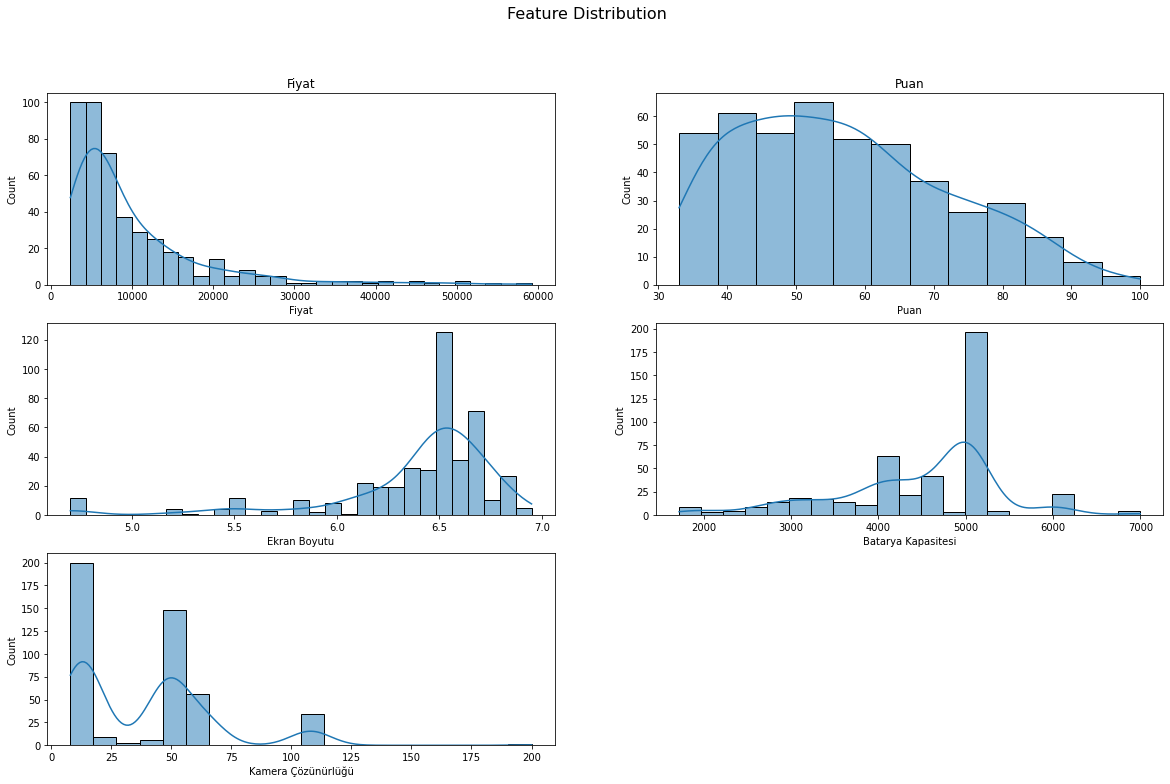

In [ ]:
#Lets observe distribution of some features in the dataframe.
plt.figure(figsize=[20,12])

plt.suptitle('Feature Distribution', fontsize = 16)

plt.subplot(3,2,1)
sns.histplot(data = df['Fiyat'], kde=True)
plt.title('Fiyat')

plt.subplot(3,2,2)
sns.histplot(data = df['Puan'], kde=True)
plt.title('Puan')


plt.subplot(3,2,3)
sns.histplot(data = df['Ekran Boyutu'], kde=True)



plt.subplot(3,2,4)
sns.histplot(data = df['Batarya Kapasitesi'], kde=True)

plt.subplot(3,2,5)
sns.histplot(data = df['Kamera Çözünürlüğü'], kde=True)
;

In [ ]:
# Logarithm of these feature because of making them normal distribution
df['Fiyat_LOG']=np.log(df['Fiyat'])
df['Puan_LOG']=np.log(df['Puan'])
df['Ekran_Boyutu_LOG']=np.log(df['Ekran Boyutu'])
df['Batarya_Kapasitesi_LOG']=np.log(df['Batarya Kapasitesi'])
df['Kamera_Cözünürlügü_LOG']=np.log(df['Kamera Çözünürlüğü'])

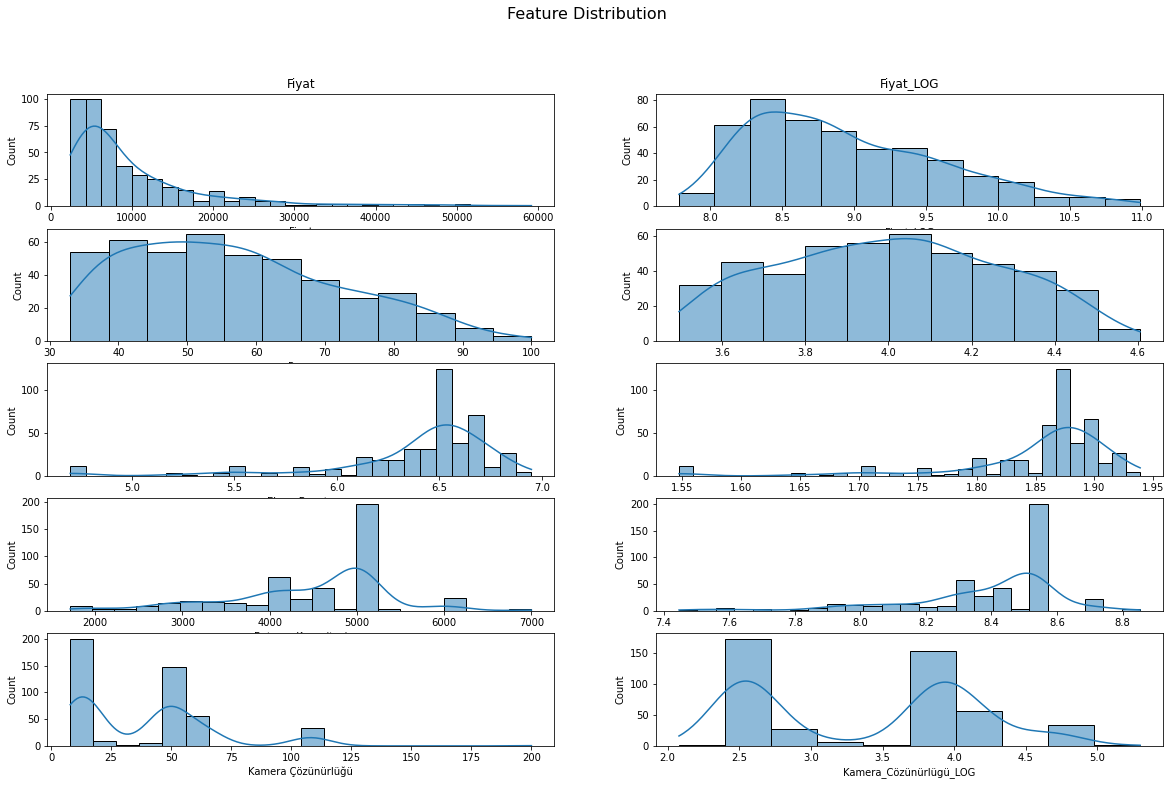

In [ ]:
plt.figure(figsize=[20,12])

plt.suptitle('Feature Distribution', fontsize = 16)

plt.subplot(5,2,1)
sns.histplot(data = df['Fiyat'], kde=True)
plt.title('Fiyat')

plt.subplot(5,2,2)
sns.histplot(data = df['Fiyat_LOG'], kde=True)
plt.title('Fiyat_LOG')

plt.subplot(5,2,3)
sns.histplot(data = df['Puan'], kde=True)


plt.subplot(5,2,4)
sns.histplot(data = df['Puan_LOG'], kde=True)


plt.subplot(5,2,5)
sns.histplot(data = df['Ekran Boyutu'], kde=True)

plt.subplot(5,2,6)
sns.histplot(data = df['Ekran_Boyutu_LOG'], kde=True)

plt.subplot(5,2,7)
sns.histplot(data = df['Batarya Kapasitesi'], kde=True)

plt.subplot(5,2,8)
sns.histplot(data = df['Batarya_Kapasitesi_LOG'], kde=True)

plt.subplot(5,2,9)
sns.histplot(data = df['Kamera Çözünürlüğü'], kde=True)

plt.subplot(5,2,10)
sns.histplot(data = df['Kamera_Cözünürlügü_LOG'], kde=True)

In [ ]:
#Lets start to make model
df_model=df.copy()

In [ ]:
# Get_dummies are applied for categorical variables.
df_model = pd.get_dummies(df_model,columns=['Parmak İzi', 'Hat Sayısı', 'Hızlı Şarj', 'İşletim Sistemi', 'NFC'],drop_first=True)

In [ ]:
df_model.head()

,Ürün,Ekran Boyutu,Dahili Depolama,Bellek(Ram),Puan,Batarya Kapasitesi,Kamera Çözünürlüğü,Ekran Yenileme Hızı,Fiyat,Fiyat_LOG,Puan_LOG,Ekran_Boyutu_LOG,Batarya_Kapasitesi_LOG,Kamera_Cözünürlügü_LOG,Parmak İzi_Yok,Hat Sayısı_Çift Hat,Hızlı Şarj_Yok,İşletim Sistemi_iOS,NFC_Yok
0,Apple iPhone 14 Pro Max (1 TB),6.70,1000.0,6.0,100.0,4323,48.0,120,59199.0,10.988660,4.605170,1.902108,8.371705,3.871201,1,1,0,1,0
1,Apple iPhone 14 Pro (1 TB),6.10,1000.0,6.0,97.0,3200,48.0,120,54959.0,10.914343,4.574711,1.808289,8.070906,3.871201,1,1,0,1,0
2,Samsung Galaxy S22 Ultra (512 GB),6.80,512.0,12.0,97.0,5000,108.0,120,34890.0,10.459956,4.574711,1.916923,8.517193,4.682131,0,1,0,0,0
3,Apple iPhone 13 Pro Max (1 TB),6.70,1000.0,6.0,94.0,4352,12.0,120,46952.0,10.756881,4.543295,1.902108,8.378391,2.484907,1,1,0,1,0
4,Xiaomi 12 Pro,6.73,256.0,12.0,94.0,4600,50.0,120,27399.9,10.218295,4.543295,1.906575,8.433812,3.912023,0,1,0,0,0


In [ ]:
#df_model['F_P']=df_model['Puan'] / df_model['Fiyat'] 
#df_model = df_model.drop('Puan', axis=1)
#df_model = df_model.drop('Fiyat', axis=1)
#df_model = df_model.drop('Ekran Boyutu', axis=1)
#df_model = df_model.drop('Batarya Kapasitesi', axis=1)

In [ ]:
#df_model = df_model.drop('Fiyat_LOG', axis=1)
#df_model = df_model.drop('Puan_LOG', axis=1)

In [ ]:
df_model.columns

Index(['Ürün', 'Ekran Boyutu', 'Dahili Depolama', 'Bellek(Ram)', 'Puan',
       'Batarya Kapasitesi', 'Kamera Çözünürlüğü', 'Ekran Yenileme Hızı',
       'Fiyat', 'Fiyat_LOG', 'Puan_LOG', 'Ekran_Boyutu_LOG',
       'Batarya_Kapasitesi_LOG', 'Kamera_Cözünürlügü_LOG', 'Parmak İzi_Yok',
       'Hat Sayısı_Çift Hat', 'Hızlı Şarj_Yok', 'İşletim Sistemi_iOS',
       'NFC_Yok'],
      dtype='object')

In [ ]:
column_names = []
for i in df_model.columns:
  column_names.append(i.replace(' ','_'))
df_model.columns = column_names
df_model = df_model.rename(columns={"Bellek(Ram)": "BellekRam"})
df_model.head()

,Ürün,Ekran_Boyutu,Dahili_Depolama,BellekRam,Puan,Batarya_Kapasitesi,Kamera_Çözünürlüğü,Ekran_Yenileme_Hızı,Fiyat,Fiyat_LOG,Puan_LOG,Ekran_Boyutu_LOG,Batarya_Kapasitesi_LOG,Kamera_Cözünürlügü_LOG,Parmak_İzi_Yok,Hat_Sayısı_Çift_Hat,Hızlı_Şarj_Yok,İşletim_Sistemi_iOS,NFC_Yok
0,Apple iPhone 14 Pro Max (1 TB),6.70,1000.0,6.0,100.0,4323,48.0,120,59199.0,10.988660,4.605170,1.902108,8.371705,3.871201,1,1,0,1,0
1,Apple iPhone 14 Pro (1 TB),6.10,1000.0,6.0,97.0,3200,48.0,120,54959.0,10.914343,4.574711,1.808289,8.070906,3.871201,1,1,0,1,0
2,Samsung Galaxy S22 Ultra (512 GB),6.80,512.0,12.0,97.0,5000,108.0,120,34890.0,10.459956,4.574711,1.916923,8.517193,4.682131,0,1,0,0,0
3,Apple iPhone 13 Pro Max (1 TB),6.70,1000.0,6.0,94.0,4352,12.0,120,46952.0,10.756881,4.543295,1.902108,8.378391,2.484907,1,1,0,1,0
4,Xiaomi 12 Pro,6.73,256.0,12.0,94.0,4600,50.0,120,27399.9,10.218295,4.543295,1.906575,8.433812,3.912023,0,1,0,0,0


In [ ]:
# These features dropped because logarithm of them are used in the model.
df_model.drop(['Fiyat','Puan','Ekran_Boyutu','Batarya_Kapasitesi','Kamera_Çözünürlüğü'], axis=1,inplace=True)

In [ ]:
df_model

,Ürün,Dahili_Depolama,BellekRam,Ekran_Yenileme_Hızı,Fiyat_LOG,Puan_LOG,Ekran_Boyutu_LOG,Batarya_Kapasitesi_LOG,Kamera_Cözünürlügü_LOG,Parmak_İzi_Yok,Hat_Sayısı_Çift_Hat,Hızlı_Şarj_Yok,İşletim_Sistemi_iOS,NFC_Yok
0,Apple iPhone 14 Pro Max (1 TB),1000.0,6.0,120,10.988660,4.605170,1.902108,8.371705,3.871201,1,1,0,1,0
1,Apple iPhone 14 Pro (1 TB),1000.0,6.0,120,10.914343,4.574711,1.808289,8.070906,3.871201,1,1,0,1,0
2,Samsung Galaxy S22 Ultra (512 GB),512.0,12.0,120,10.459956,4.574711,1.916923,8.517193,4.682131,0,1,0,0,0
3,Apple iPhone 13 Pro Max (1 TB),1000.0,6.0,120,10.756881,4.543295,1.902108,8.378391,2.484907,1,1,0,1,0
4,Xiaomi 12 Pro,256.0,12.0,120,10.218295,4.543295,1.906575,8.433812,3.912023,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,Huawei P Smart (FIG-LX1),32.0,3.0,60,8.242493,3.526361,1.731656,8.006368,2.564949,0,0,1,0,0
1333,Huawei Y7 Prime 2019,32.0,3.0,60,8.102132,3.496508,1.834180,8.294050,2.564949,0,1,1,0,1
1336,"Apple iPhone 6s (64 GB) (MKQR2TU/A, MKQQ2TU/A,...",64.0,2.0,60,7.782807,3.496508,1.547563,7.447168,2.484907,0,0,1,1,0
1350,Samsung Galaxy A02 (SM-A022F),32.0,3.0,60,8.209042,3.496508,1.871802,8.517193,2.564949,1,1,1,0,1


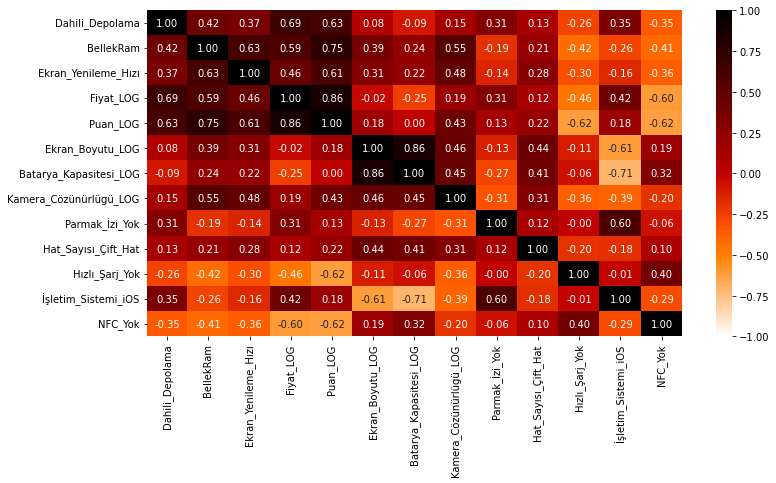

In [ ]:
plt.figure(figsize=[12,6])
sns.heatmap(df_model.corr(), cmap="gist_heat_r", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [ ]:
# There is a strong correlation(0.86) between Ekran_Boyutu_Log and Batarya_Kapasitesi_Log. 
# It causes multicollinearity problems in the model. Therefore, Ekran_Boyutu_Log is dropped because it has less correlation with target feature (Fiyat_LOG).
df_model.drop('Ekran_Boyutu_LOG',axis=1,inplace=True)
df_model.drop('Ürün',axis=1,inplace=True)

In [ ]:
# MODEL

X = df_model.drop(columns='Fiyat_LOG')
y = df_model.Fiyat_LOG

# Train/Test Split
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/Validation Split
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [ ]:
print('X Train:', x_train.shape)
print('X Validation:', x_cv.shape)
print('X test:', x_test.shape)

X Train: (273, 11)
X Validation: (91, 11)
X test: (92, 11)


In [ ]:
# First Model (Non scale)
lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred = lreg.predict(x_cv)

# MSE 
mse = np.mean((pred - y_cv)**2)
print("Validation MSE: ", mse)

# R2 Skor
print("Validation R2 Score: ", lreg.score(x_cv, y_cv))

Validation MSE:  0.050817939639766066
Validation R2 Score:  0.8803983247902392


In [ ]:
pred_test = lreg.predict(x_test) 
mse = np.mean((pred_test - y_test)**2)
print("Test MSE: ", mse)
print("Test R2 Score: ", lreg.score(x_test, y_test))

Test MSE:  0.08335926649419614
Test R2 Score:  0.8395905855538199


In [ ]:
df_model.columns

Index(['Dahili_Depolama', 'BellekRam', 'Ekran_Yenileme_Hızı', 'Fiyat_LOG',
       'Puan_LOG', 'Batarya_Kapasitesi_LOG', 'Kamera_Cözünürlügü_LOG',
       'Parmak_İzi_Yok', 'Hat_Sayısı_Çift_Hat', 'Hızlı_Şarj_Yok',
       'İşletim_Sistemi_iOS', 'NFC_Yok'],
      dtype='object')

In [ ]:
# Stat Model
lm1 = smf.ols('Fiyat_LOG ~ Dahili_Depolama + BellekRam + Ekran_Yenileme_Hızı +Puan_LOG+ Parmak_İzi_Yok + Batarya_Kapasitesi_LOG + Kamera_Cözünürlügü_LOG + Hat_Sayısı_Çift_Hat + Hızlı_Şarj_Yok + İşletim_Sistemi_iOS + NFC_Yok', data=df_model)

fit1 = lm1.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fiyat_LOG   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     221.8
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          1.43e-172
Time:                        06:21:59   Log-Likelihood:                -36.818
No. Observations:                 456   AIC:                             97.64
Df Residuals:                     444   BIC:                             147.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.4862      0.772      7.110      0.000       3.970       7.003
Dahili_Depolama            0.0008      0.000      5.297      0.000       0.000       0.001
BellekRam                  0.0470      0.012      4.040      0.000       0.024       0.070
Ekran_Yenileme_Hızı       -0.0002      0.001     -0.323      0.747      -0.002       0.001
Puan_LOG                   1.6019      0.126     12.742      0.000       1.355       1.849
Parmak_İzi_Yok             0.1974      0.058      3.405      0.001       0.083       0.311
Batarya_Kapasitesi_LOG    -0.3827      0.088     -4.361      0.000      -0.555      -0.210
Kamera_Cözünürlügü_LOG    -0.0470      0.023     -2.081      0.038      -0.091      -0.003
Hat_Sayısı_Çift_Hat        0.0548      0.038      1.431      0.153      -0.020       0.130
Hızlı_Şarj_Yok             0.0601      0.042      1.426      0.155      -0.023       0.143
İşletim_Sistemi_iOS        0.2373      0.082      2.885      0.004       0.076       0.399
NFC_Yok                   -0.0566      0.037     -1.537      0.125      -0.129       0.016
==============================================================================
Omnibus:                       31.390   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.759
Skew:                           0.452   Prob(JB):                     1.29e-12
Kurtosis:                       4.437   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Ekran_Yenileme_Hızı has high P(t) value 0.747. Lets drop it from the dataframe.
lm1 = smf.ols('Fiyat_LOG ~ Dahili_Depolama + BellekRam +Puan_LOG+ Parmak_İzi_Yok + Batarya_Kapasitesi_LOG + Kamera_Cözünürlügü_LOG + Hat_Sayısı_Çift_Hat + Hızlı_Şarj_Yok + İşletim_Sistemi_iOS + NFC_Yok', data=df_model)

fit1 = lm1.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fiyat_LOG   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     244.4
Date:                Fri, 03 Feb 2023   Prob (F-statistic):          9.42e-174
Time:                        06:23:31   Log-Likelihood:                -36.871
No. Observations:                 456   AIC:                             95.74
Df Residuals:                     445   BIC:                             141.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.5191      0.764      7.223      0.000       4.017       7.021
Dahili_Depolama            0.0008      0.000      5.294      0.000       0.000       0.001
BellekRam                  0.0466      0.012      4.031      0.000       0.024       0.069
Puan_LOG                   1.5920      0.122     13.074      0.000       1.353       1.831
Parmak_İzi_Yok             0.1995      0.058      3.466      0.001       0.086       0.313
Batarya_Kapasitesi_LOG    -0.3833      0.088     -4.373      0.000      -0.556      -0.211
Kamera_Cözünürlügü_LOG    -0.0478      0.022     -2.132      0.034      -0.092      -0.004
Hat_Sayısı_Çift_Hat        0.0528      0.038      1.398      0.163      -0.021       0.127
Hızlı_Şarj_Yok             0.0577      0.041      1.392      0.165      -0.024       0.139
İşletim_Sistemi_iOS        0.2395      0.082      2.924      0.004       0.079       0.400
NFC_Yok                   -0.0555      0.037     -1.514      0.131      -0.127       0.017
==============================================================================
Omnibus:                       31.696   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.370
Skew:                           0.455   Prob(JB):                     9.48e-13
Kurtosis:                       4.444   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Second Model - Min Max Scale
lreg2 = LinearRegression()

minmax_scale = MinMaxScaler()
x_train_mms = minmax_scale.fit_transform(x_train.values)
x_cv_mms = minmax_scale.fit_transform(x_cv.values)

lreg2.fit(x_train_mms,y_train)

pred = lreg2.predict(x_cv_mms)

mse = np.mean((pred - y_cv)**2)

print("Validation MSE: ", mse)
print("Validation Score: ", lreg2.score(x_cv_mms, y_cv))

Validation MSE:  0.062333431446386395
Validation Score:  0.8532962399615516


In [ ]:
x_test_mms = minmax_scale.fit_transform(x_test.values)

In [ ]:
pred = lreg2.predict(x_test_mms)
mse = np.mean((pred - y_test)**2)
print("Test MSE: ", mse)
print("Test Score: ", lreg2.score(x_test_mms, y_test))

Test MSE:  0.08981837084435816
Test Score:  0.827161239780625


RIDGE

In [ ]:
#Optimization of Alpha Value

from sklearn.metrics import r2_score

alphalist = np.linspace(0,4,200) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    ridge = Ridge(alpha = curr_alpha)
    ridge.fit(x_train_mms, y_train)

    val_set_pred = ridge.predict(x_cv_mms)
    err_vec_val[index] = r2_score(y_cv, val_set_pred)

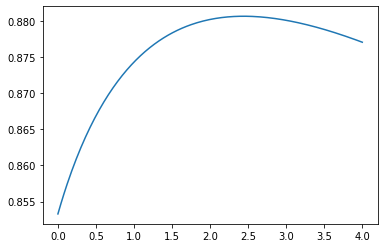

In [ ]:
plt.plot(alphalist, err_vec_val);

In [ ]:
alphalist[np.argmax(err_vec_val)]

2.4321608040201004

In [ ]:
#RİDGE MODEL

from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=2.4321608040201004)

ridgeReg.fit(x_train_mms,y_train)

pred = ridgeReg.predict(x_cv_mms)

mse = np.mean((pred - y_cv)**2)

print("Validaiton MSE: ", mse)
print("Validation Score: ", ridgeReg.score(x_cv_mms, y_cv))

Validaiton MSE:  0.0507073339519045
Validation Score:  0.8806586388771491


In [ ]:
x_test_mms = minmax_scale.fit_transform(x_test.values)

In [ ]:
pred = ridgeReg.predict(x_test_mms)
mse = np.mean((pred - y_test)**2)
print("Validaiton MSE: ", mse)
print("Test Score: ", ridgeReg.score(x_test_mms, y_test))

Validaiton MSE:  0.09264291275942496
Test Score:  0.8217259338604834
